In [4]:
import csv
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import csv

1. set variables to be processed

In [30]:
PATH_TO_INPUT_CSV = "out/citations_per_year.csv"
PATH_TO_NO_DUPLICATE_CSV = "out/no_duplicates_citations_per_year.csv"
GRAPH_CMAP = "tab20b" #color map to be used for each section of the graph
CUTOFF_YEAR = 2013 #only publications DURING and AFTER this year will be counted
START_YEAR = 2018
END_YEAR = 2023


GRAPH_YEARS = END_YEAR - START_YEAR + 1 #year range count, inclusive
TOTAL_YEARS = END_YEAR - CUTOFF_YEAR + 1

2. read the data file

In [35]:
data = [] #only the necessary data for graphing is put here
data_full = [] #all the data is put here to check for duplicates

with open(PATH_TO_NO_DUPLICATE_CSV, "r") as f:
    reader = csv.reader(f)
    header = next(reader)
    data_full.append(header)
    #for every article...
    for row in reader:
        data_full.append(row)
        row_to_add = []
        row_to_add.append(row[3]) #add publication date
        row_to_add = row_to_add+row[9:] #add irp group, citations per year
        data.append(row_to_add)

print(data)
#data is a 2D array of [publication year, irp group, 2018 citations, 2019 citations, 2020 citations, 2021 citations, 2022 citations, 2023 citations] in every row

[['2023', '0', '0', '0', '0', '0', '0'], ['2023', '0', '0', '0', '0', '4', '2'], ['2022', '0', '0', '0', '0', '0', '1'], ['2022', '0', '0', '0', '0', '3', '3'], ['2022', '0', '0', '0', '0', '0', '0'], ['2022', '0', '0', '0', '0', '0', '1'], ['2022', '0', '0', '0', '0', '3', '4'], ['2022', '0', '0', '0', '0', '6', '3'], ['2022', '0', '0', '0', '0', '3', '2'], ['2022', '0', '0', '0', '0', '10', '6'], ['2021', '0', '0', '0', '0', '4', '5'], ['2021', '0', '0', '0', '3', '6', '3'], ['2021', '0', '0', '0', '1', '4', '1'], ['2020', '0', '0', '0', '9', '15', '7'], ['2020', '0', '0', '0', '6', '3', '4'], ['2020', '0', '0', '0', '3', '6', '2'], ['2020', '0', '0', '6', '5', '9', '4'], ['2020', '0', '0', '3', '4', '5', '4'], ['2019', '0', '1', '7', '7', '8', '1'], ['2019', '0', '0', '3', '3', '1', '3'], ['2019', '0', '3', '7', '5', '2', '3'], ['2019', '0', '2', '15', '7', '10', '7'], ['2018', '0', '2', '0', '1', '5', '0'], ['2018', '0', '6', '5', '7', '8', '4'], ['2017', '5', '5', '12', '10', '10'

In [36]:
#check for duplicate publications

data_cleaned = []
unique_pubs = []

for row in range(len(data_full)):
    if data_full[row][2] not in unique_pubs:
        unique_pubs.append(data_full[row][2])
        data_cleaned.append(data_full[row])
    else:
        print(f"{data_full[row][2]} has already been processed")

print(f"original file has {len(data_full)} publications")
print(f"new file has {len(data_cleaned)} publications")

if len(data_full) != len(data_cleaned):
    with open("out/no_duplicates_citations_per_year.csv", "w", newline='') as f:
        writer = csv.writer(f)
        for row in data_cleaned:
            writer.writerow(row)

    

original file has 6548 publications
new file has 6548 publications


3. group publications into dictionaries based on their year of publication. keys are the years of publication. the items consist of a 2D array, with rows as the different years and columns as an article's metrics (citations received).

```
format looks like this: 
d = {
    "year1_publications": [
        ["publication_a's metrics in year1", "publication_b's metrics in year1", "publication_c's metrics in year1],
        ["publication_a's metrics in year2", "publication_b's metrics in year2", "publication_c's metrics in year2],
        ["publication_a's metrics in year3", "publication_b's metrics in year3", "publication_c's metrics in year3]
        ],
    "year2_publications": [
        ["publication_x's metrics in year1", "publication_y's metrics in year1", "publication_z's metrics in year1],
        ["publication_x's metrics in year2", "publication_y's metrics in year2", "publication_z's metrics in year2],
        ["publication_x's metrics in year3", "publication_y's metrics in year3", "publication_z's metrics in year3]
        ]
}
```


In [37]:
WINDOW_YEARS = 5
d = {}
d_window = {}
for year in range(CUTOFF_YEAR,END_YEAR+1):
    #format csv file into dictionaries grouped by publication year
    formatted_array = np.array([row[1:] for row in data if row[0]==str(year)]).T
    d[f"{year}_publications"] = np.array([[int(pt) for pt in formatted_array[row]] for row in range(len(formatted_array))])
    # puts all the publications into dictionary


In [48]:
total_citations_per_year = [[np.sum(d[key][year]) for key in d.keys()] for year in range(0,GRAPH_YEARS)]
print(total_citations_per_year)

[[3646, 3071, 3431, 3371, 2819, 995, 19, 3, 0, 0, 0], [3576, 3120, 3396, 3617, 3890, 3371, 1053, 36, 1, 0, 0], [3628, 3119, 3319, 3736, 4249, 4412, 3551, 1053, 66, 3, 0], [3834, 3214, 3613, 3999, 4657, 5062, 5137, 3773, 1459, 73, 1], [3638, 2789, 3224, 3637, 4565, 4753, 5061, 4427, 4428, 1355, 31], [2343, 1711, 2030, 2318, 2720, 2974, 3253, 2883, 3633, 2315, 339]]


In [47]:
print(d)

{'2013_publications': array([[ 5,  2,  2, ..., 96,  0,  2],
       [ 2,  0,  2, ..., 53,  2,  0],
       [ 2,  3,  0, ..., 36,  0,  2],
       [ 5,  2,  1, ..., 22,  0,  2],
       [ 5,  0,  0, ..., 15,  1,  1],
       [ 1,  1,  0, ..., 17,  0,  0]]), '2014_publications': array([[ 1,  4,  3, ...,  3,  3,  6],
       [ 1,  1,  1, ...,  0,  1, 17],
       [ 3,  5,  4, ...,  4,  0, 12],
       [ 3,  6,  4, ...,  2,  2, 15],
       [ 3,  3,  2, ...,  1,  0, 27],
       [ 0,  2,  0, ...,  1,  0, 11]]), '2015_publications': array([[ 7,  1,  4, ...,  2, 28,  2],
       [ 3,  2,  4, ...,  5, 34,  0],
       [ 5,  1,  1, ...,  3, 40,  3],
       [ 2,  2,  4, ...,  0, 23,  1],
       [ 0,  2,  1, ...,  2, 21,  3],
       [ 2,  0,  4, ...,  2, 19,  1]]), '2016_publications': array([[ 1,  0,  2, ..., 27, 10,  7],
       [ 1,  0,  1, ..., 23,  4,  6],
       [ 2,  0,  0, ..., 27,  9, 11],
       [ 0,  0,  4, ..., 19, 13, 11],
       [ 4,  0,  1, ..., 27,  9,  3],
       [ 0,  0,  2, ..., 15,  5,  5

4. find the cumulative amount of each year's citation received. this is stored in d_summed

In [78]:
d_summed = {}

for year in d.keys():
    d_summed[year] = [np.sum(row) for row in d[year]]

print(d_summed)

{'2013_publications': [3646, 3576, 3628, 3834, 3638, 2343], '2014_publications': [3071, 3120, 3119, 3214, 2789, 1711], '2015_publications': [3431, 3396, 3319, 3613, 3224, 2030], '2016_publications': [3371, 3617, 3736, 3999, 3637, 2318], '2017_publications': [2819, 3890, 4249, 4657, 4565, 2720], '2018_publications': [995, 3371, 4412, 5062, 4753, 2974], '2019_publications': [19, 1053, 3551, 5137, 5061, 3253], '2020_publications': [3, 36, 1053, 3773, 4427, 2883], '2021_publications': [0, 1, 66, 1459, 4428, 3633], '2022_publications': [0, 0, 3, 73, 1355, 2315], '2023_publications': [0, 0, 0, 1, 31, 339]}


In [89]:
WINDOW_DURATION = 5

d_summed_window = {}

i = int(START_YEAR)
count = 0

# year 0 = CUTOFF; year 1 = CUTOFF + 1
for year in d_summed.keys():
    year_int = int(str(year).split("_")[0])
    d_summed_window[year] = []
    for r in range(len(d_summed[year])):
        column_year = r + START_YEAR
        year_diff = column_year - year_int
        print(year_diff)
        if year_diff <= WINDOW_DURATION:
            d_summed_window[year].append(d_summed[year][r])
        else:
            d_summed_window[year].append(0)
    
print(d_summed_window)

5
6
7
8
9
10
4
5
6
7
8
9
3
4
5
6
7
8
2
3
4
5
6
7
1
2
3
4
5
6
0
1
2
3
4
5
-1
0
1
2
3
4
-2
-1
0
1
2
3
-3
-2
-1
0
1
2
-4
-3
-2
-1
0
1
-5
-4
-3
-2
-1
0
{'2013_publications': [3646, 0, 0, 0, 0, 0], '2014_publications': [3071, 3120, 0, 0, 0, 0], '2015_publications': [3431, 3396, 3319, 0, 0, 0], '2016_publications': [3371, 3617, 3736, 3999, 0, 0], '2017_publications': [2819, 3890, 4249, 4657, 4565, 0], '2018_publications': [995, 3371, 4412, 5062, 4753, 2974], '2019_publications': [19, 1053, 3551, 5137, 5061, 3253], '2020_publications': [3, 36, 1053, 3773, 4427, 2883], '2021_publications': [0, 1, 66, 1459, 4428, 3633], '2022_publications': [0, 0, 3, 73, 1355, 2315], '2023_publications': [0, 0, 0, 1, 31, 339]}


In [40]:
years = range(START_YEAR, END_YEAR+1, 1)

graph_data = {}
for year in range(START_YEAR, END_YEAR+1):
    list_to_append = []
    for pub_year in d.keys():
        print(f"{pub_year} citations in {year}: {np.sum(d[pub_year][year-START_YEAR])}")
        list_to_append.append(np.sum(d[pub_year][year-START_YEAR]))
    graph_data[f"{year}"] = list_to_append

2013_publications citations in 2018: 3646
2014_publications citations in 2018: 3071
2015_publications citations in 2018: 3431
2016_publications citations in 2018: 3371
2017_publications citations in 2018: 2819
2018_publications citations in 2018: 995
2019_publications citations in 2018: 19
2020_publications citations in 2018: 3
2021_publications citations in 2018: 0
2022_publications citations in 2018: 0
2023_publications citations in 2018: 0
2013_publications citations in 2019: 3576
2014_publications citations in 2019: 3120
2015_publications citations in 2019: 3396
2016_publications citations in 2019: 3617
2017_publications citations in 2019: 3890
2018_publications citations in 2019: 3371
2019_publications citations in 2019: 1053
2020_publications citations in 2019: 36
2021_publications citations in 2019: 1
2022_publications citations in 2019: 0
2023_publications citations in 2019: 0
2013_publications citations in 2020: 3628
2014_publications citations in 2020: 3119
2015_publications 

In [43]:
print(graph_data)

{'2018': [3646, 3071, 3431, 3371, 2819, 995, 19, 3, 0, 0, 0], '2019': [3576, 3120, 3396, 3617, 3890, 3371, 1053, 36, 1, 0, 0], '2020': [3628, 3119, 3319, 3736, 4249, 4412, 3551, 1053, 66, 3, 0], '2021': [3834, 3214, 3613, 3999, 4657, 5062, 5137, 3773, 1459, 73, 1], '2022': [3638, 2789, 3224, 3637, 4565, 4753, 5061, 4427, 4428, 1355, 31], '2023': [2343, 1711, 2030, 2318, 2720, 2974, 3253, 2883, 3633, 2315, 339]}


In [46]:
graph_data_window = {}
for year in range(START_YEAR, END_YEAR+1):
    list_to_append = []
    for pub_year in d.keys():
        if year - int(pub_year.split("_")[0]) > 5:
            list_to_append.append(0)
        else:
            # print(f"{pub_year} citations in {year}: {np.sum(d[pub_year][year-START_YEAR])}")
            list_to_append.append(np.sum(d[pub_year][year-START_YEAR]))
    graph_data_window[f"{year}"] = list_to_append
print(graph_data_window)

{'2018': [3646, 3071, 3431, 3371, 2819, 995, 19, 3, 0, 0, 0], '2019': [0, 3120, 3396, 3617, 3890, 3371, 1053, 36, 1, 0, 0], '2020': [0, 0, 3319, 3736, 4249, 4412, 3551, 1053, 66, 3, 0], '2021': [0, 0, 0, 3999, 4657, 5062, 5137, 3773, 1459, 73, 1], '2022': [0, 0, 0, 0, 4565, 4753, 5061, 4427, 4428, 1355, 31], '2023': [0, 0, 0, 0, 0, 2974, 3253, 2883, 3633, 2315, 339]}


[17355, 22060, 27136, 34822, 37908, 26519]
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3646.0, 3576.0, 3628.0, 3834.0, 3638.0, 2343.0], [6717.0, 6696.0, 6747.0, 7048.0, 6427.0, 4054.0], [10148.0, 10092.0, 10066.0, 10661.0, 9651.0, 6084.0], [13519.0, 13709.0, 13802.0, 14660.0, 13288.0, 8402.0], [16338.0, 17599.0, 18051.0, 19317.0, 17853.0, 11122.0], [17333.0, 20970.0, 22463.0, 24379.0, 22606.0, 14096.0], [17352.0, 22023.0, 26014.0, 29516.0, 27667.0, 17349.0], [17355.0, 22059.0, 27067.0, 33289.0, 32094.0, 20232.0], [17355.0, 22060.0, 27133.0, 34748.0, 36522.0, 23865.0], [17355.0, 22060.0, 27136.0, 34821.0, 37877.0, 26180.0]]


C:\Users\caoyut\AppData\Local\Temp\ipykernel_3524\2267988115.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=[f"{int(y/1000)}K" for y in y_labels])


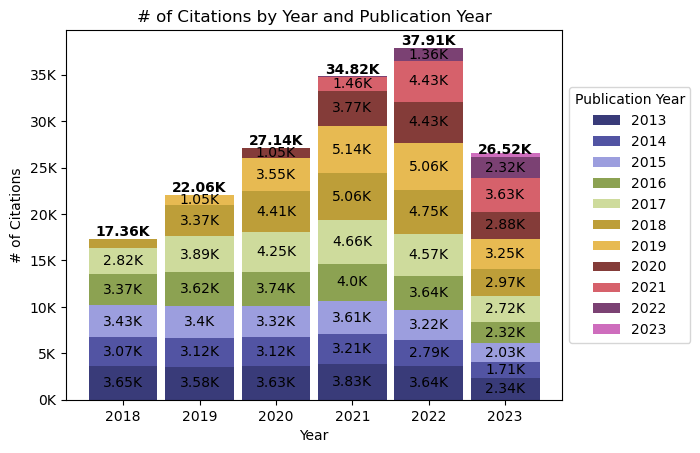

In [41]:
#create figure
fig, ax = plt.subplots()


#find total publications of every year
running_total = [0, 0, 0, 0, 0, 0]
for year in d_summed.keys():
    for i in range(0, GRAPH_YEARS):
        running_total[i] += int(d_summed[year][i])
print(running_total)

#set colors of the graph as equal intervals apart on colormap
colors = {}
cmap = matplotlib.colormaps[GRAPH_CMAP]
cmap_picker = 1/len(d_summed.keys())
cmap_idx = 0
for year in d_summed.keys():
    colors[year] = cmap(cmap_idx)
    cmap_idx += cmap_picker

all_citations = [] #stores number of citations per section of the bar graph; label to add onto bar graph
y_intervals = [] #stores the point at which each section in the bar graph stops; where to put label onto bar graph

bottom = np.zeros(GRAPH_YEARS) #starting point of where to append next stack in the bar graph
width = 0.9 #width of the bar
year_labels = graph_data.keys()

for year, citations in d_summed.items():
    all_citations.append(citations)
    y_intervals.append(bottom.tolist())
    p = ax.bar(year_labels, citations, width, label=year.split("_")[0], bottom = bottom, color=colors[year]) #create a stack
    bottom += citations #update where to append next stack

print(y_intervals)
#reformat the string text; do not add text if # citations is lower than 1000
all_citations_str = [[f"{round(count/1000, 2)}K" if count >= 1000 else "" for count in row] for row in all_citations]
running_total_str = [f"{round(count/1000, 2)}K" for count in running_total]

#add labels
x_intervals = range(0,GRAPH_YEARS)
for year_idx in range(len(x_intervals)):
    #add labels for each section of bar graph
    for y in range(len(y_intervals)):
        ax.text(x_intervals[year_idx],
                y_intervals[y][year_idx]+(all_citations[y][year_idx]/2), 
                all_citations_str[y][year_idx], 
                ha="center", va="center")
    #add total count label
    ax.text(x_intervals[year_idx],
            y_intervals[-1][year_idx], 
            running_total_str[year_idx], 
            ha="center", va="bottom",weight="bold")
            

y_labels = ax.get_yticks()
ax.set_yticklabels(labels=[f"{int(y/1000)}K" for y in y_labels])

ax.legend(loc="center left", bbox_to_anchor=(1,0.5), title="Publication Year")

ax.set_title("# of Citations by Year and Publication Year")
ax.set_xlabel("Year")
ax.set_ylabel("# of Citations")

plt.show()

[[3646, 0, 0, 0, 0, 0], [3071, 3120, 0, 0, 0, 0], [3431, 3396, 3319, 0, 0, 0], [3371, 3617, 3736, 3999, 0, 0], [2819, 3890, 4249, 4657, 4565, 0], [995, 3371, 4412, 5062, 4753, 2974], [19, 1053, 3551, 5137, 5061, 3253], [3, 36, 1053, 3773, 4427, 2883], [0, 1, 66, 1459, 4428, 3633], [0, 0, 3, 73, 1355, 2315], [0, 0, 0, 1, 31, 339]]
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3646.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6717.0, 3120.0, 0.0, 0.0, 0.0, 0.0], [10148.0, 6516.0, 3319.0, 0.0, 0.0, 0.0], [13519.0, 10133.0, 7055.0, 3999.0, 0.0, 0.0], [16338.0, 14023.0, 11304.0, 8656.0, 4565.0, 0.0], [17333.0, 17394.0, 15716.0, 13718.0, 9318.0, 2974.0], [17352.0, 18447.0, 19267.0, 18855.0, 14379.0, 6227.0], [17355.0, 18483.0, 20320.0, 22628.0, 18806.0, 9110.0], [17355.0, 18484.0, 20386.0, 24087.0, 23234.0, 12743.0], [17355.0, 18484.0, 20389.0, 24160.0, 24589.0, 15058.0]]
[['3.65 K', '', '', '', '', ''], ['3.07 K', '3.12 K', '', '', '', ''], ['3.43 K', '3.4 K', '3.32 K', '', '', ''], ['3.37 K', '3.62 K', '3.74 K', '4.

C:\Users\caoyut\AppData\Local\Temp\ipykernel_3524\4274832682.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=[f"{int(y/1000)} K" for y in y_labels])


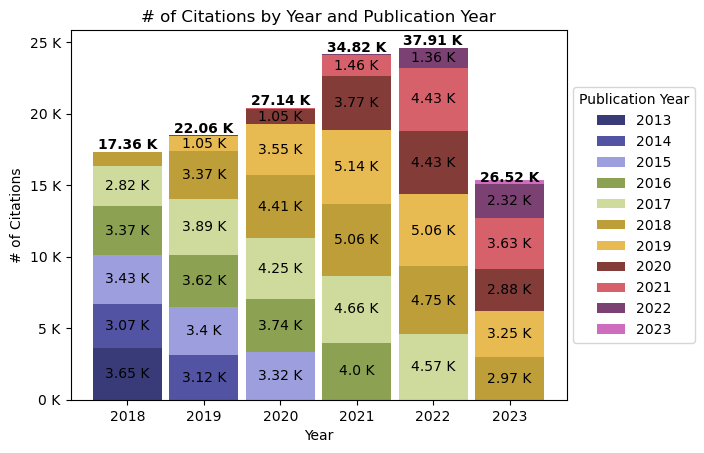

In [90]:
# limit each year to a 5-year span

fig, ax = plt.subplots()
bottom = np.zeros(GRAPH_YEARS)
width = 0.9

colors = {}
cmap = matplotlib.colormaps["tab20b"]
cmap_picker = 1/len(d_summed_window.keys())
cmap_idx = 0

for year in d_summed.keys():
    colors[year] = cmap(cmap_idx)
    cmap_idx += cmap_picker
    
year_labels = graph_data_window.keys()

all_citations = []
y_intervals = []

for year, citations in d_summed_window.items():
    all_citations.append(citations)
    y_intervals.append(bottom.tolist())
    p = ax.bar(year_labels, citations, width, label=year.split("_")[0], bottom = bottom, color=colors[year])
    bottom += citations

print(all_citations)
print(y_intervals)

# all_citations_str = [[f"{round(count/1000, 2)} K" if count >= 1000 else f"{count}" for count in row] for row in all_citations]
all_citations_str = [[f"{round(count/1000, 2)} K" if count >= 1000 else "" for count in row] for row in all_citations]
print(all_citations_str)

ax.set_title("# of Citations by Year and Publication Year")

running_total_str = [f"{round(count/1000, 2)} K" for count in running_total]
x_intervals = range(0,6)
for year_idx in range(len(x_intervals)):
    for y in range(len(y_intervals)):
        ax.text(x_intervals[year_idx],y_intervals[y][year_idx]+(all_citations[y][year_idx]/2), all_citations_str[y][year_idx], ha="center", va="center")
    ax.text(x_intervals[year_idx],y_intervals[-1][year_idx], running_total_str[year_idx], ha="center", va="bottom",weight="bold")

y_labels = ax.get_yticks()
ax.set_yticklabels(labels=[f"{int(y/1000)} K" for y in y_labels])
ax.legend(loc="center left", bbox_to_anchor=(1,0.5), title="Publication Year")
ax.set_xlabel("Year")
ax.set_ylabel("# of Citations")
plt.show()

In [21]:
df = pd.DataFrame(d_summed)
df.to_csv("publications_per_year.csv")

In [22]:
smsmd = [row[2:] for row in data if row[1]=='Sensory Motor Systems & Movement Disorders']
bir = [row[2:] for row in data if row[1]=='Brain Injury & Repair']
lmd = [row[2:] for row in data if row[1]=='Learning Memory & Dementias']
bdnd = [row[2:] for row in data if row[1]=='Brain Development & Neurodevelopmental Disorders']
mha = [row[2:] for row in data if row[1]=='Mental Health & Addictions']

In [23]:
smsmd_arr = np.array(smsmd)
bir_arr = np.array(bir)
lmd_arr = np.array(lmd)
bdnd_arr = np.array(bdnd)
mha_arr = np.array(mha)

smsmd_years = np.array([[int(data) for data in smsmd[row]] for row in range(len(smsmd_arr))]).T
bir_years = np.array([[int(data) for data in bir[row]] for row in range(len(bir_arr))]).T
lmd_years = np.array([[int(data) for data in lmd[row]] for row in range(len(lmd_arr))]).T
bdnd_years = np.array([[int(data) for data in bdnd[row]] for row in range(len(bdnd_arr))]).T
mha_years = np.array([[int(data) for data in mha[row]] for row in range(len(mha_arr))]).T

In [24]:
print(smsmd_years)

[]
